# **Load the datset and preprocess the dta**


In [1]:
import pandas as pd

# Load dataset
file_path = 'sentimentdataset.csv'
data = pd.read_csv(file_path)


data = data.drop(['Unnamed: 0'], axis=1)


data = data.dropna(subset=['Text', 'Sentiment'])
print(data.head())


   Unnamed: 0.1                                               Text  \
0             0   Enjoying a beautiful day at the park!        ...   
1             1   Traffic was terrible this morning.           ...   
2             2   Just finished an amazing workout! 💪          ...   
3             3   Excited about the upcoming weekend getaway!  ...   
4             4   Trying out a new recipe for dinner tonight.  ...   

     Sentiment            Timestamp            User     Platform  \
0   Positive    2023-01-15 12:30:00   User123          Twitter     
1   Negative    2023-01-15 08:45:00   CommuterX        Twitter     
2   Positive    2023-01-15 15:45:00   FitnessFan      Instagram    
3   Positive    2023-01-15 18:20:00   AdventureX       Facebook    
4   Neutral     2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traff

# **Preprocess the text using NLP**

In [2]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = text.split()  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
data['Cleaned_Text'] = data['Text'].apply(preprocess_text)
print(data[['Text', 'Cleaned_Text']].head())


                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                       Cleaned_Text  
0       enjoying beautiful day park  
1          traffic terrible morning  
2          finished amazing workout  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Sentiment Score and Analysis**

In [3]:
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)


Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64


In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
data['Sentiment_Score'] = data['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment as Positive, Negative, or Neutral
data['Sentiment_Label'] = data['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))
print(data[['Cleaned_Text', 'Sentiment_Score', 'Sentiment_Label']].head())


                       Cleaned_Text  Sentiment_Score Sentiment_Label
0       enjoying beautiful day park           0.8074        Positive
1          traffic terrible morning          -0.4767        Negative
2          finished amazing workout           0.5859        Positive
3  excited upcoming weekend getaway           0.3400        Positive
4  trying new recipe dinner tonight           0.0000         Neutral


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# **Visualization of the Analysis**

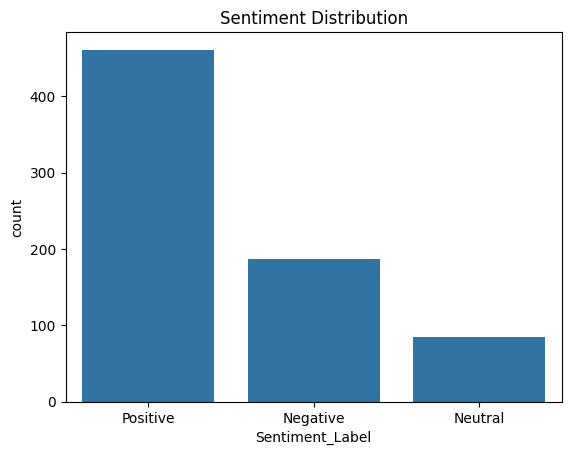

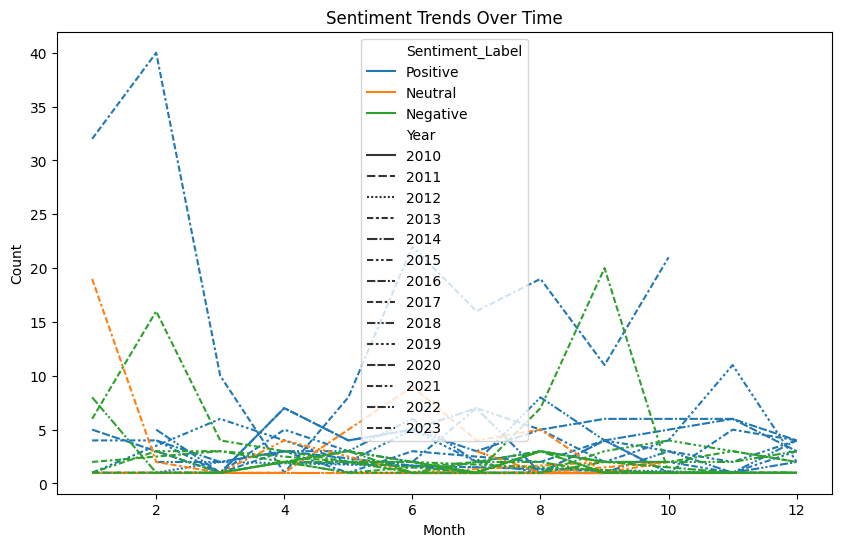

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='Sentiment_Label', data=data)
plt.title('Sentiment Distribution')
plt.show()

# Sentiment trend over months
sentiment_trend = data.groupby(['Year', 'Month', 'Sentiment_Label']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_trend, x='Month', y='Count', hue='Sentiment_Label', style='Year')
plt.title('Sentiment Trends Over Time')
plt.show()


# **Insights and Analysis**

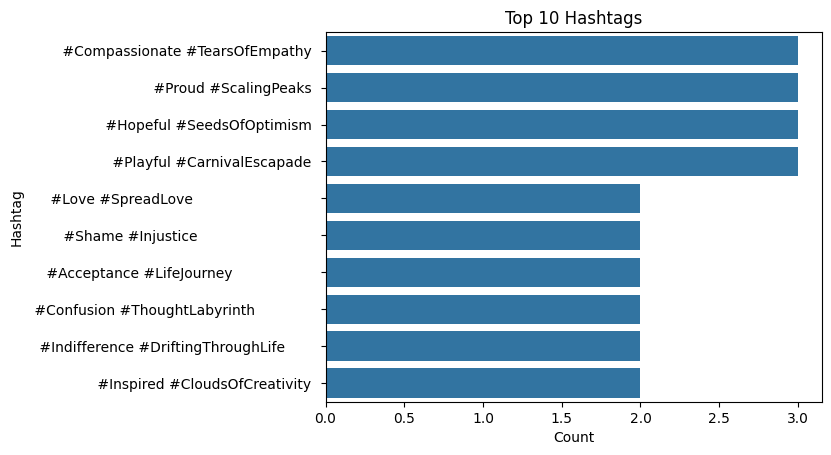

In [6]:
from collections import Counter

# Extract hashtags
data['Hashtags'] = data['Hashtags'].fillna('')
hashtags_list = data['Hashtags'].apply(lambda x: x.split(',')).sum()
top_hashtags = Counter(hashtags_list).most_common(10)

# Visualize top hashtags
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])
sns.barplot(x='Count', y='Hashtag', data=hashtags_df)
plt.title('Top 10 Hashtags')
plt.show()
